## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Electric Vehicle Registration Dataset

In [5]:
ev=pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev.head(3)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23.0,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26.0,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36.0,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [54]:
ev.tail(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
138776,5YJYGDEE7M,Benton,Richland,WA,99352.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,181300416,POINT (-119.29441499999996 46.27187500000008),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10
138777,WBY33AW08P,Pierce,Tacoma,WA,98443.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,25.0,224612055,POINT (-122.36463499999996 47.19449000000003),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
138778,JN1AZ0CP2B,King,Seattle,WA,98118.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,37.0,246621546,POINT (-122.28338999999994 47.549285000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [6]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         138779 non-null  object 
 1   County                                             138776 non-null  object 
 2   City                                               138776 non-null  object 
 3   State                                              138779 non-null  object 
 4   Postal Code                                        138776 non-null  float64
 5   Model Year                                         138779 non-null  int64  
 6   Make                                               138779 non-null  object 
 7   Model                                              138493 non-null  object 
 8   Electric Vehicle Type                              138779 non-null  object

In [12]:
ev.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 315
DOL Vehicle ID                                         0
Vehicle Location                                       6
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

### Comparission of Electric Vehicle Type (BEV vs. PHEV) 

In [14]:
ev_types=ev['Electric Vehicle Type'].value_counts()
ev_types

Battery Electric Vehicle (BEV)            106792
Plug-in Hybrid Electric Vehicle (PHEV)     31987
Name: Electric Vehicle Type, dtype: int64

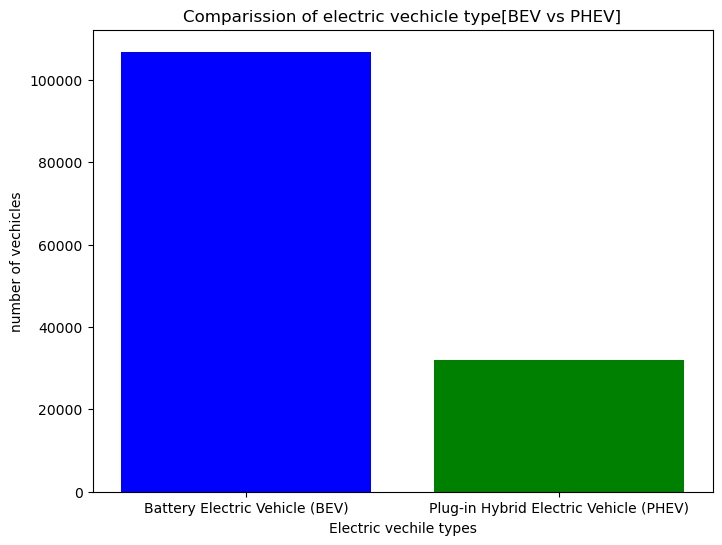

In [21]:
plt.figure(figsize=(8,6))
plt.bar(ev_types.index,ev_types.values,color=['b','g'])
plt.xlabel('Electric vechile types')
plt.ylabel('number of vechicles')
plt.title('Comparission of electric vechicle type[BEV vs PHEV]')
plt.show()

In [22]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [24]:
ev_value_counts=ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
ev_value_counts

Clean Alternative Fuel Vehicle Eligible                         61391
Eligibility unknown as battery range has not been researched    60162
Not eligible due to low battery range                           17226
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

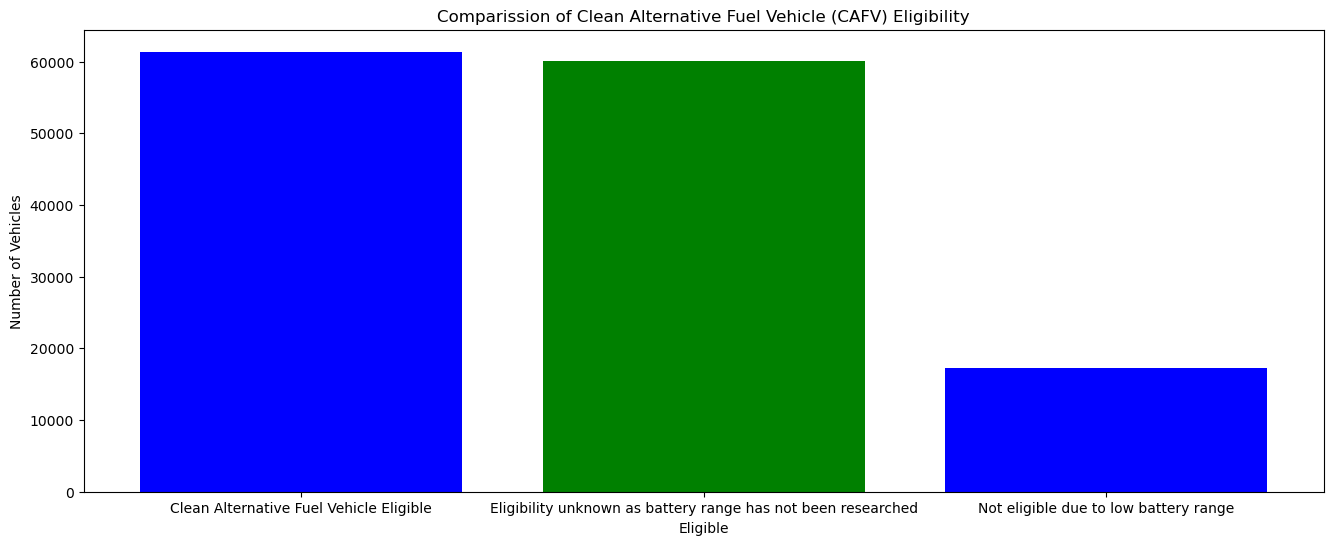

In [26]:
plt.figure(figsize=(16,6))
plt.bar(ev_value_counts.index,ev_value_counts.values,color=['b','g'])
plt.xlabel('Eligible')
plt.ylabel('Number of Vehicles')
plt.title('Comparission of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()

### Postal Codes with Most EV

In [28]:
postal_code_counts=ev['Postal Code'].value_counts()
postal_code_counts

98052.0    3563
98012.0    2467
98033.0    2448
98004.0    2341
98006.0    2274
           ... 
92201.0       1
29483.0       1
20603.0       1
98845.0       1
80019.0       1
Name: Postal Code, Length: 789, dtype: int64

In [31]:
top_15_postal_codes=postal_code_counts.head(15)
top_15_postal_codes

98052.0    3563
98012.0    2467
98033.0    2448
98004.0    2341
98006.0    2274
98115.0    2203
98074.0    1986
98040.0    1958
98072.0    1957
98034.0    1892
98103.0    1768
98188.0    1751
98075.0    1626
98059.0    1515
98501.0    1489
Name: Postal Code, dtype: int64

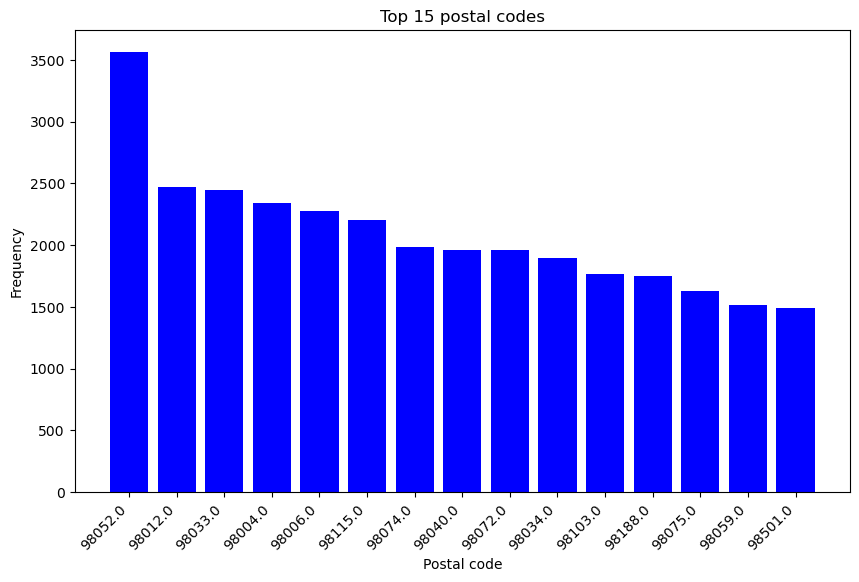

In [32]:
plt.figure(figsize=(10,6))
plt.bar(top_15_postal_codes.index.astype(str),top_15_postal_codes.values,color='b')
plt.xlabel('Postal code')
plt.ylabel('Frequency')
plt.title('Top 15 postal codes')
plt.xticks(rotation=45,ha='right')
plt.show()

### County with Most EV

In [35]:
county_counts=ev['County'].value_counts()
CN_counts=county_counts.head(15)
CN_counts

King         72919
Snohomish    15707
Pierce       10633
Clark         8227
Thurston      4974
Kitsap        4582
Spokane       3418
Whatcom       3409
Benton        1705
Island        1542
Skagit        1541
Clallam        852
Jefferson      834
Chelan         826
San Juan       808
Name: County, dtype: int64

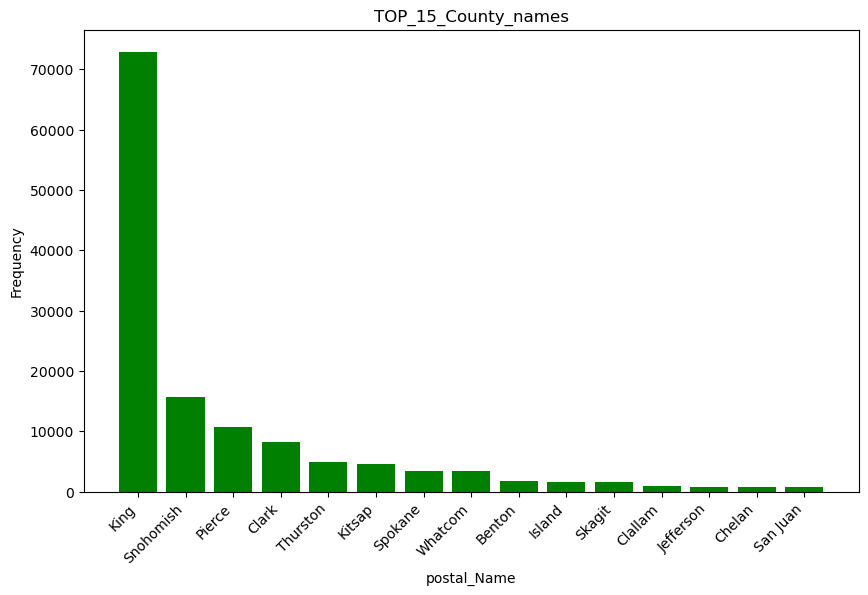

In [43]:
plt.figure(figsize=(10,6))
plt.bar(CN_counts.index.astype(str),CN_counts.values,color='g')
plt.xlabel('postal_Name')
plt.ylabel('Frequency')
plt.title('TOP_15_County_names')
plt.xticks(rotation=45,ha='right')
plt.show()

### Number of EV's Registered by Model Year

In [52]:
model_year_counts=ev['Model Year'].value_counts().sort_index()
model_year_counts

1997        1
1998        1
1999        4
2000        9
2002        2
2003        1
2008       19
2010       24
2011      786
2012     1651
2013     4570
2014     3581
2015     4921
2016     5658
2017     8555
2018    14369
2019    10506
2020    11056
2021    18258
2022    27697
2023    26986
2024      124
Name: Model Year, dtype: int64

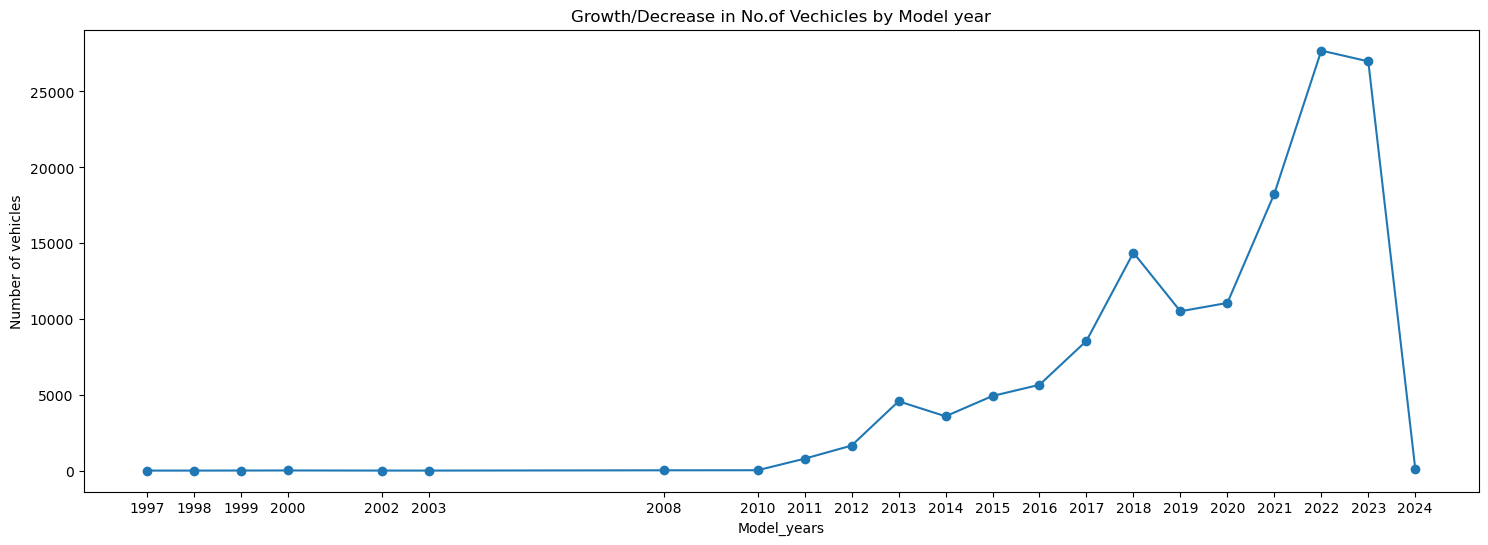

In [53]:
plt.figure(figsize=(18,6))
plt.plot(model_year_counts.index,model_year_counts.values,marker='o',linestyle='-')
plt.xlabel('Model_years')
plt.ylabel('Number of vehicles')
plt.title('Growth/Decrease in No.of Vechicles by Model year')
plt.xticks(model_year_counts.index)
plt.show()

### Top 15 EV's Maker

In [56]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [65]:
Make=ev['Make'].value_counts()
print(Make)
Manufacturing=Make.head(15)

TESLA                   63187
NISSAN                  13207
CHEVROLET               11548
FORD                     7068
BMW                      6028
KIA                      5671
TOYOTA                   4949
VOLKSWAGEN               3712
VOLVO                    3328
JEEP                     2946
AUDI                     2794
HYUNDAI                  2631
CHRYSLER                 2396
RIVIAN                   1933
PORSCHE                   980
MERCEDES-BENZ             862
FIAT                      818
HONDA                     801
MITSUBISHI                764
MINI                      758
POLESTAR                  728
SUBARU                    369
SMART                     276
JAGUAR                    222
LINCOLN                   220
LUCID                     160
CADILLAC                  127
LEXUS                      88
GENESIS                    77
MAZDA                      53
LAND ROVER                 44
FISKER                     16
AZURE DYNAMICS              8
TH!NK     

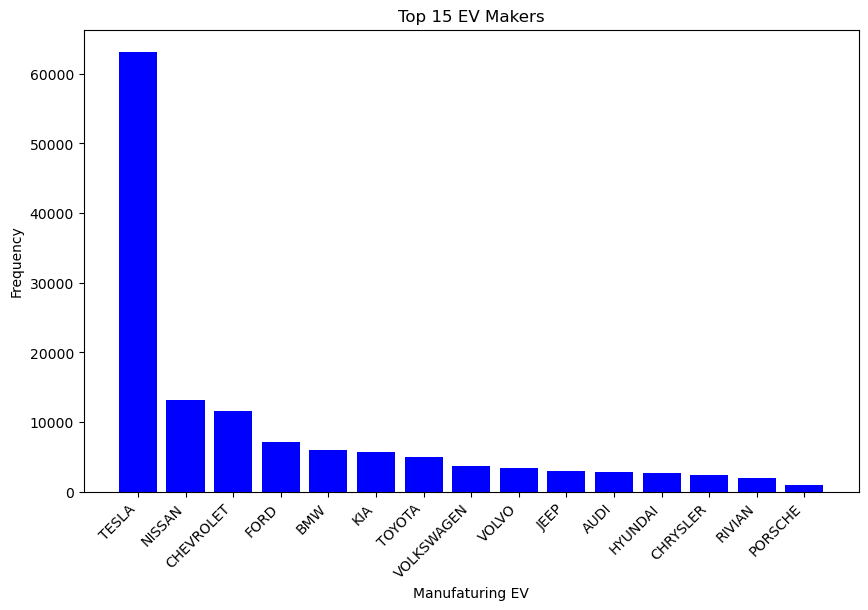

In [66]:
plt.figure(figsize=(10,6))
plt.bar(Manufacturing.index,Manufacturing.values,color='b')
plt.xlabel('Manufaturing EV')
plt.ylabel('Frequency')
plt.title('Top 15 EV Makers')
plt.xticks(rotation=45,ha='right')
plt.show()

### Top 15 EV Model

In [71]:
model=ev['Model'].value_counts()
print(model)
Models=model.head(15)

MODEL 3        25925
MODEL Y        24859
LEAF           13030
MODEL S         7442
BOLT EV         5467
               ...  
A8 E               2
745LE              2
918                1
FLYING SPUR        1
S-10 PICKUP        1
Name: Model, Length: 126, dtype: int64


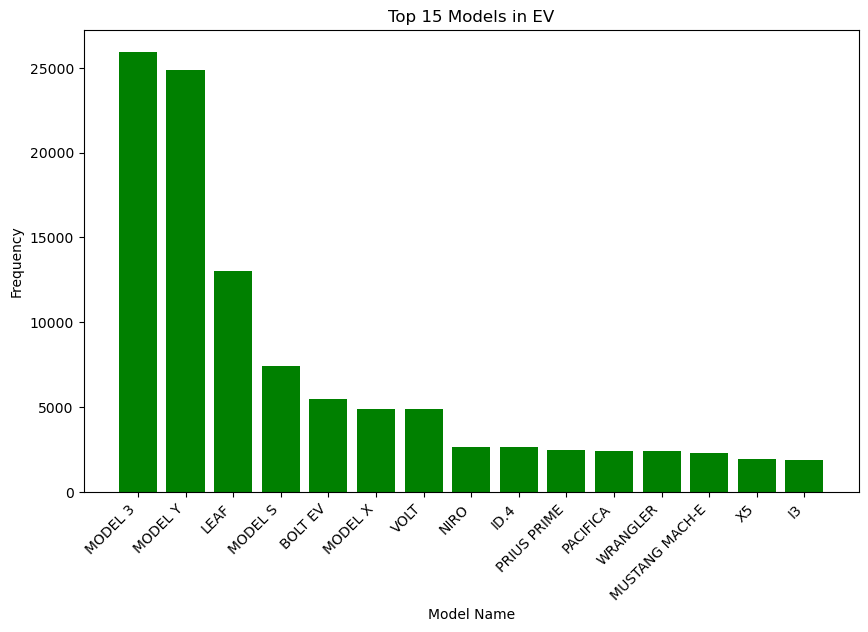

In [74]:
plt.figure(figsize=(10,6))
plt.bar(Models.index.astype(str),Models.values,color='g')
plt.xlabel('Model Name')
plt.ylabel('Frequency')
plt.title('Top 15 Models in EV')
plt.xticks(rotation=45,ha='right')
plt.show()

### Car Makers with Average EV Range

In [75]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [80]:
ev['Electric Range']

0          75
1         150
2         293
3         234
4          73
         ... 
138774     28
138775      0
138776      0
138777      0
138778     73
Name: Electric Range, Length: 138779, dtype: int64

In [87]:
df=ev['Electric Range'].dropna()
df

0          75
1         150
2         293
3         234
4          73
         ... 
138774     28
138775      0
138776      0
138777      0
138778     73
Name: Electric Range, Length: 138779, dtype: int64

In [90]:
electric_range_counts=ev.groupby(['Make'])['Electric Range'].mean().sort_values(ascending=False)
electric_range_counts

Make
JAGUAR                  206.594595
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
TESLA                    97.349740
CHEVROLET                96.504676
NISSAN                   86.507837
FIAT                     85.639364
SMART                    62.416667
AZURE DYNAMICS           56.000000
KIA                      55.369952
AUDI                     54.961704
PORSCHE                  48.203061
HONDA                    46.624220
BMW                      39.562541
POLESTAR                 37.126374
FISKER                   33.000000
CHRYSLER                 32.268364
VOLKSWAGEN               30.491379
LEXUS                    29.852273
MITSUBISHI               29.024869
HYUNDAI                  27.221969
TOYOTA                   26.782986
CADILLAC                 26.346457
MAZDA                    26.000000
LINCOLN                  23.513636
JEEP                     22.332654
LAND ROVER               21.909091
MINI                     21.763852
BENTLEY        

In [91]:
Top_15_model_counts=electric_range_counts.head(15)
Top_15_model_counts

Make
JAGUAR                  206.594595
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
TESLA                    97.349740
CHEVROLET                96.504676
NISSAN                   86.507837
FIAT                     85.639364
SMART                    62.416667
AZURE DYNAMICS           56.000000
KIA                      55.369952
AUDI                     54.961704
PORSCHE                  48.203061
HONDA                    46.624220
BMW                      39.562541
POLESTAR                 37.126374
Name: Electric Range, dtype: float64

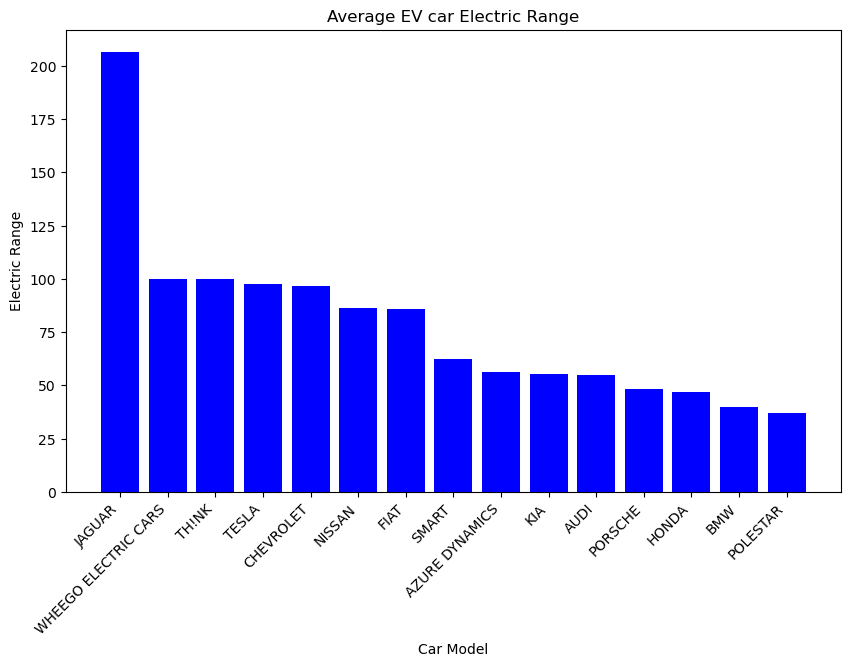

In [95]:
plt.figure(figsize=(10,6))
plt.bar(Top_15_model_counts.index.astype(str),Top_15_model_counts.values,color='b')
plt.xlabel('Car Model')
plt.ylabel('Electric Range')
plt.title('Average EV car Electric Range')
plt.xticks(rotation=45,ha='right')
plt.show()

### Car Models with Average EV Range

In [96]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [98]:
electric_range_model=ev.groupby(['Model'])['Electric Range'].mean().sort_values(ascending=False)
electric_range_model

Model
KONA         258.000000
ROADSTER     234.893617
I-PACE       206.594595
MODEL S      185.002016
BOLT EV      159.749040
                ...    
R1T            0.000000
EQB-CLASS      0.000000
IONIQ 6        0.000000
E-TRON GT      0.000000
EDV            0.000000
Name: Electric Range, Length: 126, dtype: float64

In [100]:
ER_model_counts=electric_range_model.head(15)
ER_model_counts

Model
KONA                258.000000
ROADSTER            234.893617
I-PACE              206.594595
MODEL S             185.002016
BOLT EV             159.749040
MODEL X             158.352462
MODEL 3             128.220521
E-TRON              121.937567
E-GOLF              107.181818
RAV4                102.612903
WHEEGO              100.000000
CITY                100.000000
E-TRON SPORTBACK     98.365854
SOUL EV              97.192140
SOUL                 93.000000
Name: Electric Range, dtype: float64

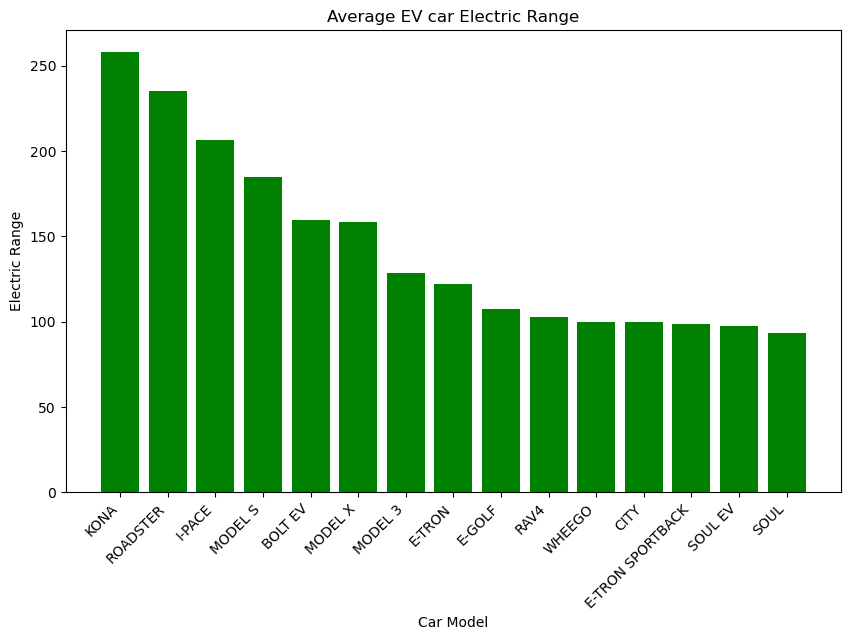

In [103]:
plt.figure(figsize=(10,6))
plt.bar(ER_model_counts.index.astype(str),ER_model_counts.values,color='g')
plt.xlabel('Car Model')
plt.ylabel('Electric Range')
plt.title('Average EV car Electric Range')
plt.xticks(rotation=45,ha='right')
plt.show()